# CORONA VIRUS

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection

the number of people who have reportedly died while sick with Coronavirus

the number of people who have reportedly recovered from it


Now find the number of deaths  as a target variable

https://github.com/dsrscientist/DSData/blob/master/aggregate_covid_country.csv

#### Importing the file

In [1]:
import pandas as pd
df=pd.read_csv("covid19.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


our target variable is 'Deaths'i.e the number of deaths per country .

As we can see the target variable has continuous values we shall go for Regression.

In [2]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

The 'Date' column refers to the date on which the records were taken

'country' shows the countries across the world that suffered from the virus

'confirmed' indicates the number of confirmed covid cases

'Recovered'indicates the number of recoveries 

'Deaths': is our target variable that states the number of people who died due to covid-19

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [4]:
#checking for null values

df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

There are no null values in the dataset

In [5]:
#checking the datatype

df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [6]:
df.shape

(23688, 5)

# EDA

In [7]:
#importing libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt

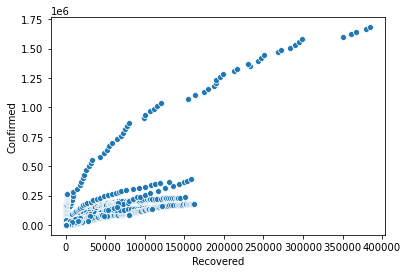

In [8]:
#plt.figure(figsize=(10,5))
sns.scatterplot(x='Recovered',y='Confirmed',data=df)
plt.show()

The density of recovered patients is more in the range from 0 to 150000

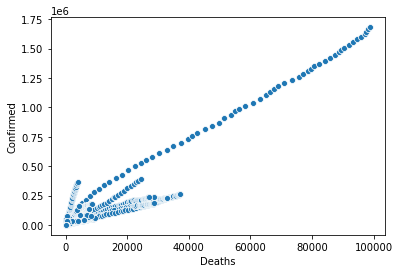

In [9]:
sns.scatterplot(x='Deaths',y='Confirmed',data=df)
plt.show()

The death rate is high from 0 to 40000

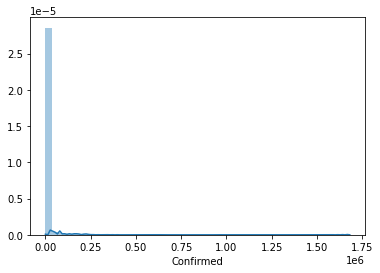

In [10]:
#distribution of the features

sns.distplot(df['Confirmed'])
plt.show()

the data is not normally distributed

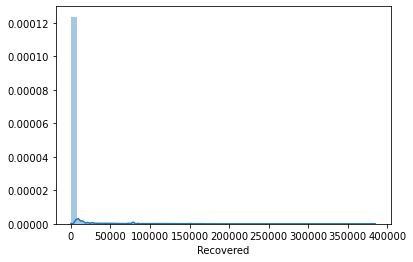

In [11]:
#distribution of the recoveries

sns.distplot(df['Recovered'])
plt.show()

again the data is not distributed well and has skewness

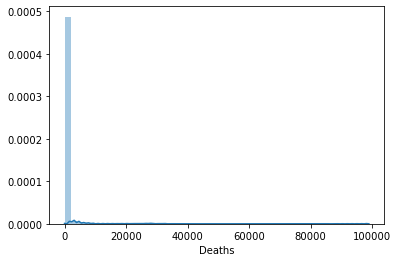

In [12]:
#distribution of the label

sns.distplot(df['Deaths'])
plt.show()

# Data cleaning

As there is no significant effect of date and country in the dataset we can drop them

In [13]:
df=df.drop(['Date','Country'],axis=1)
df

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


#### visualization

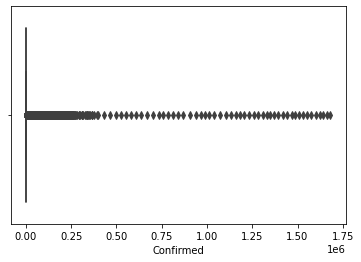

In [14]:
sns.boxplot(df['Confirmed'])

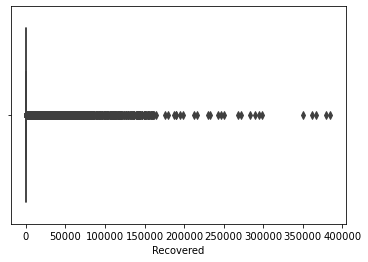

In [15]:
sns.boxplot(df['Recovered'])

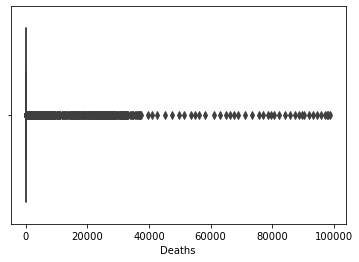

In [16]:
sns.boxplot(df['Deaths'])

we can see that there are many otliers but we cannot drop them as they are important

# correlation

In [17]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


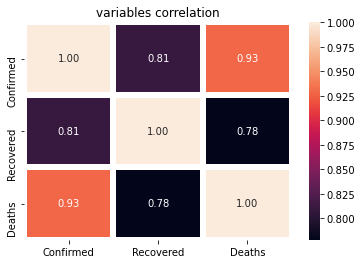

In [18]:
sns.heatmap(df.corr(),annot=True,linewidth=5,linecolor='white',fmt='0.2f')
plt.title("variables correlation")
plt.show()

#### observation:

'Confirmed' variable has a very strong positive correlation with the target variable which is 0.93

'Recovered' also has a very strong positive correlation(0.78) with the target varibale

In [19]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


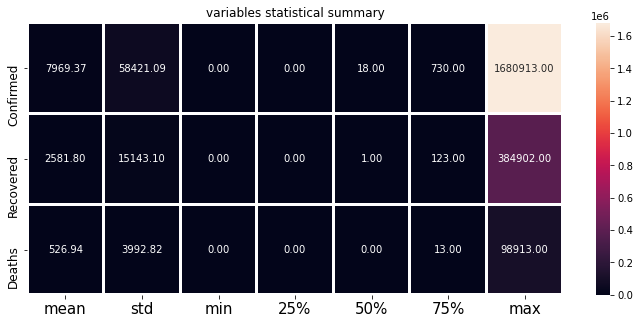

In [20]:
plt.figure(figsize=(12,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=15)  #setting the label sizes x tick is similar to x label
plt.yticks(fontsize=12)
plt.title('variables statistical summary')
plt.show()

#### observations

1) confirmed:
    
    min=0.00
    max=1680913
    mean=7969
    std-dev=58421

2)Recovered:
    
    min=0.00
    max=384902
    mean=2581
    std-dev=15143
    
3)Deaths:
    
    min=0.00
    max=98913
    mean=526.94
    std-dev=3992.82
    

# skewness

In [21]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

The data has skewness but as it has crucial information we should not prefer dropping or reducinf the skewness

In [22]:
from scipy.stats import zscore
zscore(df)

array([[-0.13641539, -0.17049719, -0.13197356],
       [-0.13641539, -0.17049719, -0.13197356],
       [-0.13641539, -0.17049719, -0.13197356],
       ...,
       [-0.13215314, -0.16983681, -0.11970126],
       [-0.12066732, -0.1483084 , -0.13022038],
       [-0.13545681, -0.16884624, -0.13097174]])

In [23]:
import numpy as np
z=np.abs(zscore(df))
z.shape

(23688, 3)

In [24]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [25]:
df_new=df[(z<3).all(axis=1)]
print("original shape=",df.shape)
print("new shape=",df_new.shape)

original shape= (23688, 3)
new shape= (23177, 3)


In [26]:
#percentage loss

loss_percent=((23688-23177)/23688)*100
print(loss_percent)

2.157210401891253


As the percentage loss is very less we can prefer dropping the entries where z score is greater than 3

# assigning x and y 

In [27]:
x=df_new.iloc[:,:-1]
x.sample()

,Confirmed,Recovered
7396,0,0


In [28]:
y=df_new.iloc[:,-1] # or 3(positive indexing)
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

# transformation and scalling

In [29]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x

array([[-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       ...,
       [ 0.72632509,  0.37203629],
       [ 1.03027292,  1.28617797],
       [ 0.32944011,  0.67855172]])

In [30]:
#standard scaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       [-1.11523507, -0.92085422],
       ...,
       [ 0.72632509,  0.37203629],
       [ 1.03027292,  1.28617797],
       [ 0.32944011,  0.67855172]])

# let us check for the best available random state

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state i=",i)
        print("for random state",i)
        print("the train accuray is",r2_score(y_train,pred_train)*100)
        print("the testing accuray is",r2_score(y_test,pred_test)*100)
        print("\n")
        
    

At random state i= 18
for random state 18
the train accuray is 9.189448449996618
the testing accuray is 9.201277494547622


At random state i= 29
for random state 29
the train accuray is 9.155892571510659
the testing accuray is 9.239410165989803


At random state i= 30
for random state 30
the train accuray is 9.20315177496719
the testing accuray is 9.159559577420406


At random state i= 55
for random state 55
the train accuray is 9.176397510020283
the testing accuray is 9.237468812314365


At random state i= 57
for random state 57
the train accuray is 9.18723853729253
the testing accuray is 9.190545859647948


At random state i= 61
for random state 61
the train accuray is 9.194702792994558
the testing accuray is 9.185981251376429


At random state i= 68
for random state 68
the train accuray is 9.171170132397588
the testing accuray is 9.243414767245884


At random state i= 70
for random state 70
the train accuray is 9.190103254658165
the testing accuray is 9.203782650902559


At random 

#### Selecting 61 as the best random state

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=61) 

# model building

#### Linear regression

In [33]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
print("r2_score=",r2_score(y_test,lr_predict))
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print("cross validation score =",cvscore)

r2_score= 0.0918598125137643
cross validation score = 0.09259398916609356


the r2 score is very low therefore we move on and try few more algorithms

# hyperparameter tuning

# Decision tree 

In [37]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}

DTR= DecisionTreeRegressor()
clf=GridSearchCV(DTR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [38]:
DTR=DecisionTreeRegressor(criterion='mae',splitter='best')
DTR.fit(x_train,y_train)
DTR_predict=DTR.predict(x_test)
DTRS=r2_score(y_test,DTR_predict)*100
print("r2 score=",DTRS)
DTRscore=cross_val_score(DTR,x_train,y_train,cv=4).mean()*100
print('cross val score=',DTRscore)

r2 score= 29.933059515997208
cross val score= 60.015301972175614


# Gradient boosting

In [43]:
#finding best parameters for gradient boosting

from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200,300]}
gbr=GradientBoostingRegressor()
gbc=GridSearchCV(gbr,parameters)
gbc.fit(x_train,y_train)
print(gbc.best_params_)



{'loss': 'ls', 'n_estimators': 50}


In [53]:
#building the model using the best parameters obtained above

gbr=GradientBoostingRegressor(loss='ls',n_estimators=50)
gbr.fit(x_train,y_train)
gbr_predict=gbr.predict(x_test)
gbrs=r2_score(y_test,gbr_predict)*100
print("r2 score=",gbrs)
gbrscore=cross_val_score(gbr,x_train,y_train,cv=4).mean()*100
print('cross val score=',gbrscore)

r2 score= 63.8569232520084
cross val score= 69.13532584422425


# Random Forest

In [57]:
rf=RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
rfS=r2_score(y_test,rf_predict)*100
print("r2 score=",rfS)
rfscore=cross_val_score(rf,x_train,y_train,cv=4).mean()*100
rfscore.mean()
print('cross val score=',rfscore)


r2 score= 61.0946620361805
cross val score= 75.1446862690348


from the above observations we can conclude that the best model so far is achieved with GradientBoosting algorithm

# Serialization

In [58]:
import pickle
filename="covid-19-model.pkl"
pickle.dump(gbr,open(filename,'wb'))

# Comparing the results

In [59]:
import numpy as np
a=np.array(y_test)
a

array([ 0, 10,  7, ...,  0,  1, 28], dtype=int64)

In [60]:
predicted=np.array(gbr.predict(x_test))

In [65]:
df_com=pd.DataFrame({'original':a,'predicted':predicted})
df_com

,original,predicted
0,0,5.779220
1,10,17.484861
2,7,7.629334
3,3,7.629334
4,0,5.779220
...,...,...
6949,0,5.779220
6950,0,5.779220
6951,0,5.779220
6952,1,6.172539
